In [90]:
# %reset
import pandas as pd
import matplotlib.pyplot as plt
from numpy import ma
import numpy as np
import pickle
from sklearn.utils import shuffle
from sklearn import tree
from os import listdir
from matplotlib.tri import Triangulation

df=shuffle(pickle.load(open('working_data/initial_changed_data.pickle','rb')).sample(2500))
Y = pd.read_parquet('src_data/baseline_data.pqt')['is_attributed'].astype('int')
Y=Y.loc[df.index].values
X=df.values

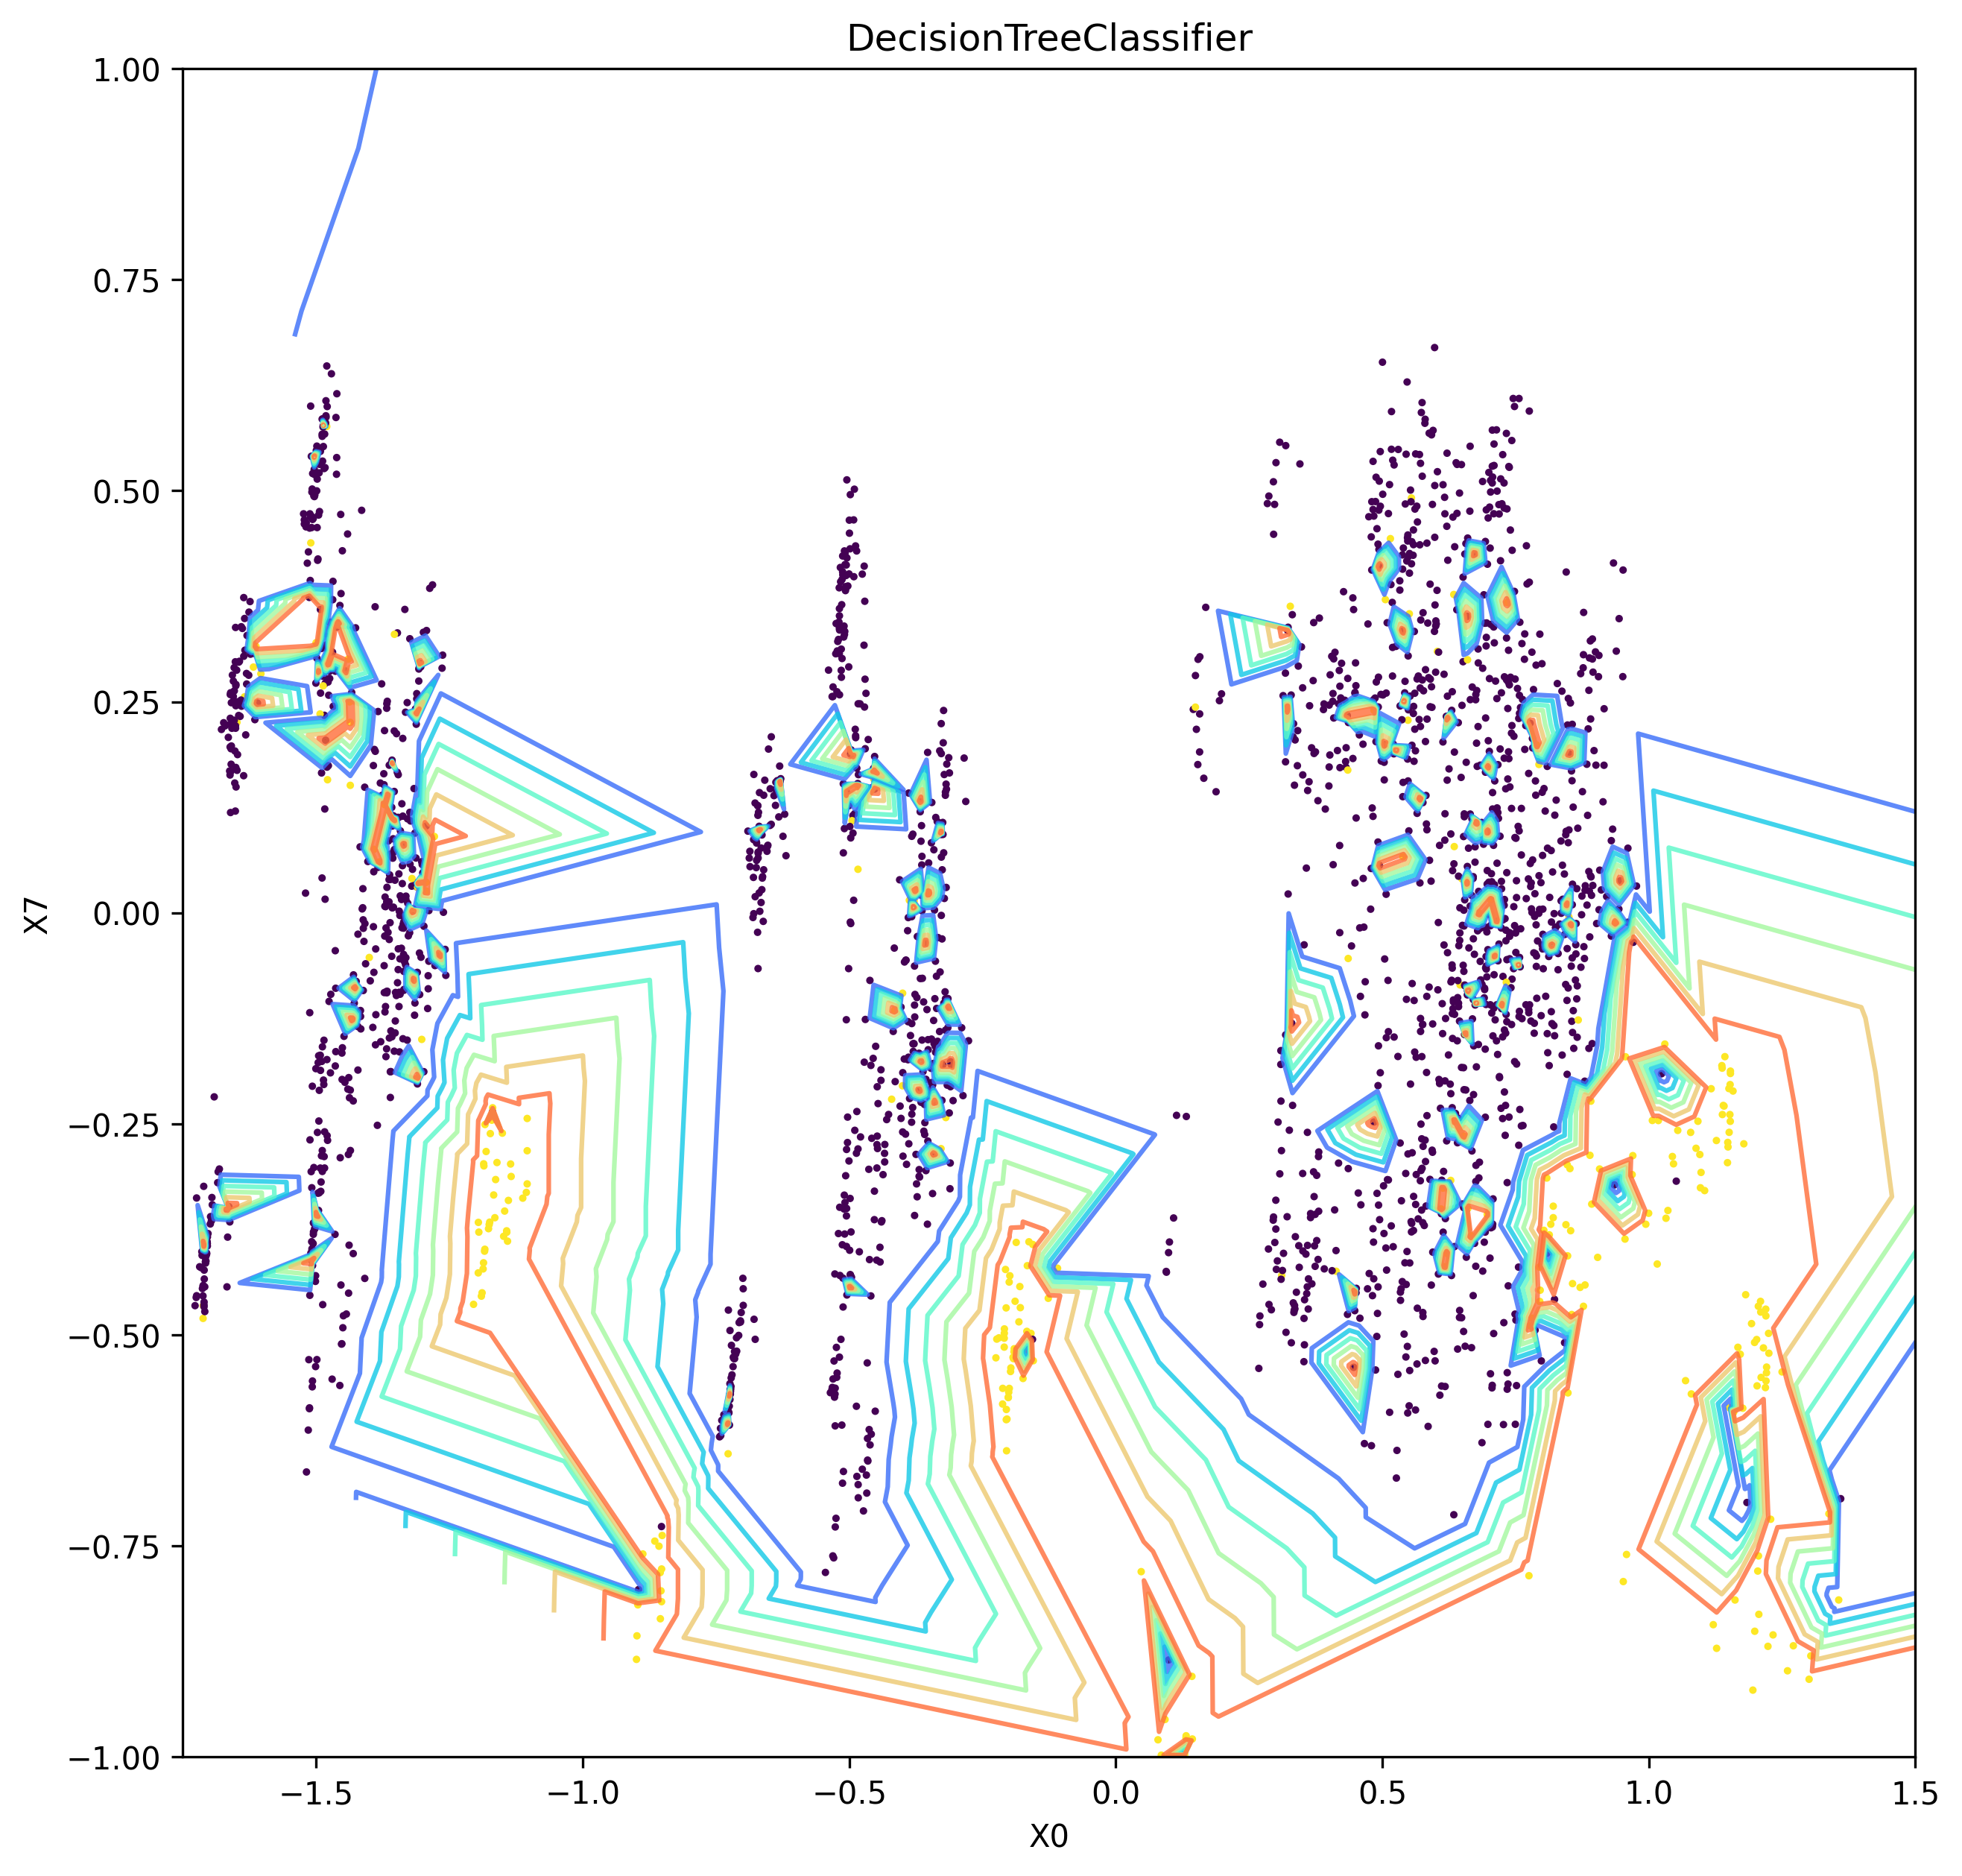

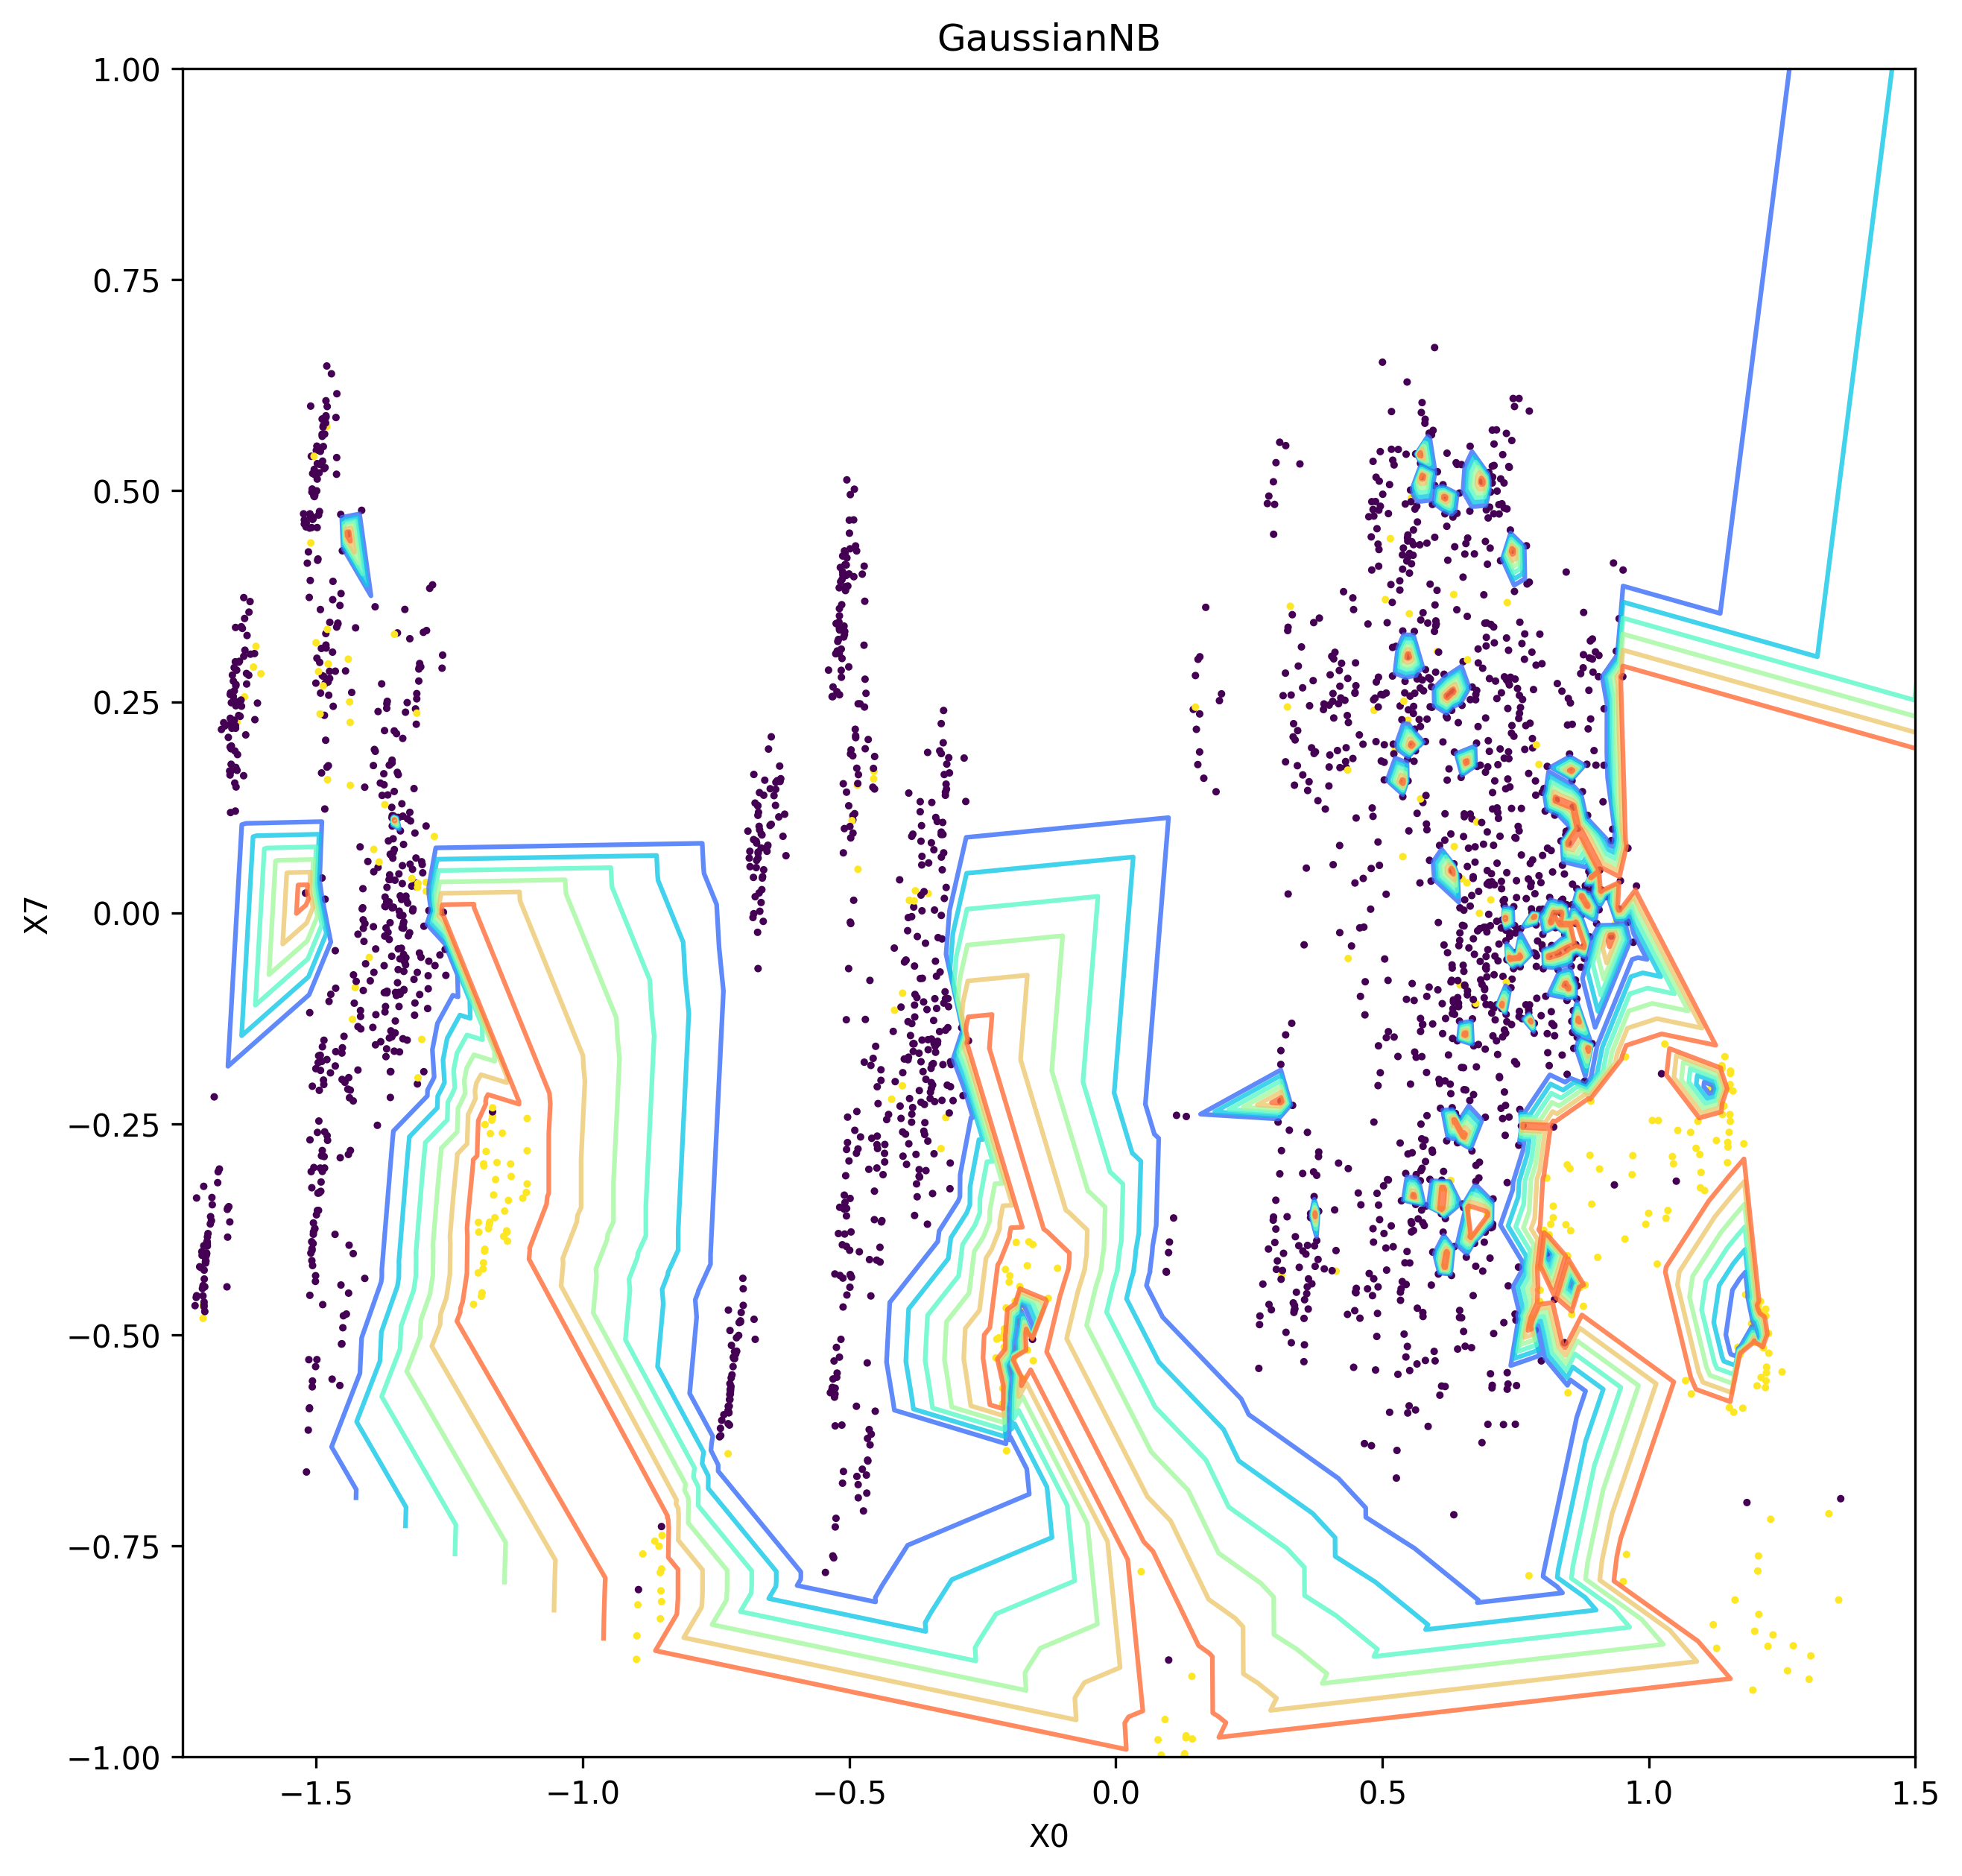

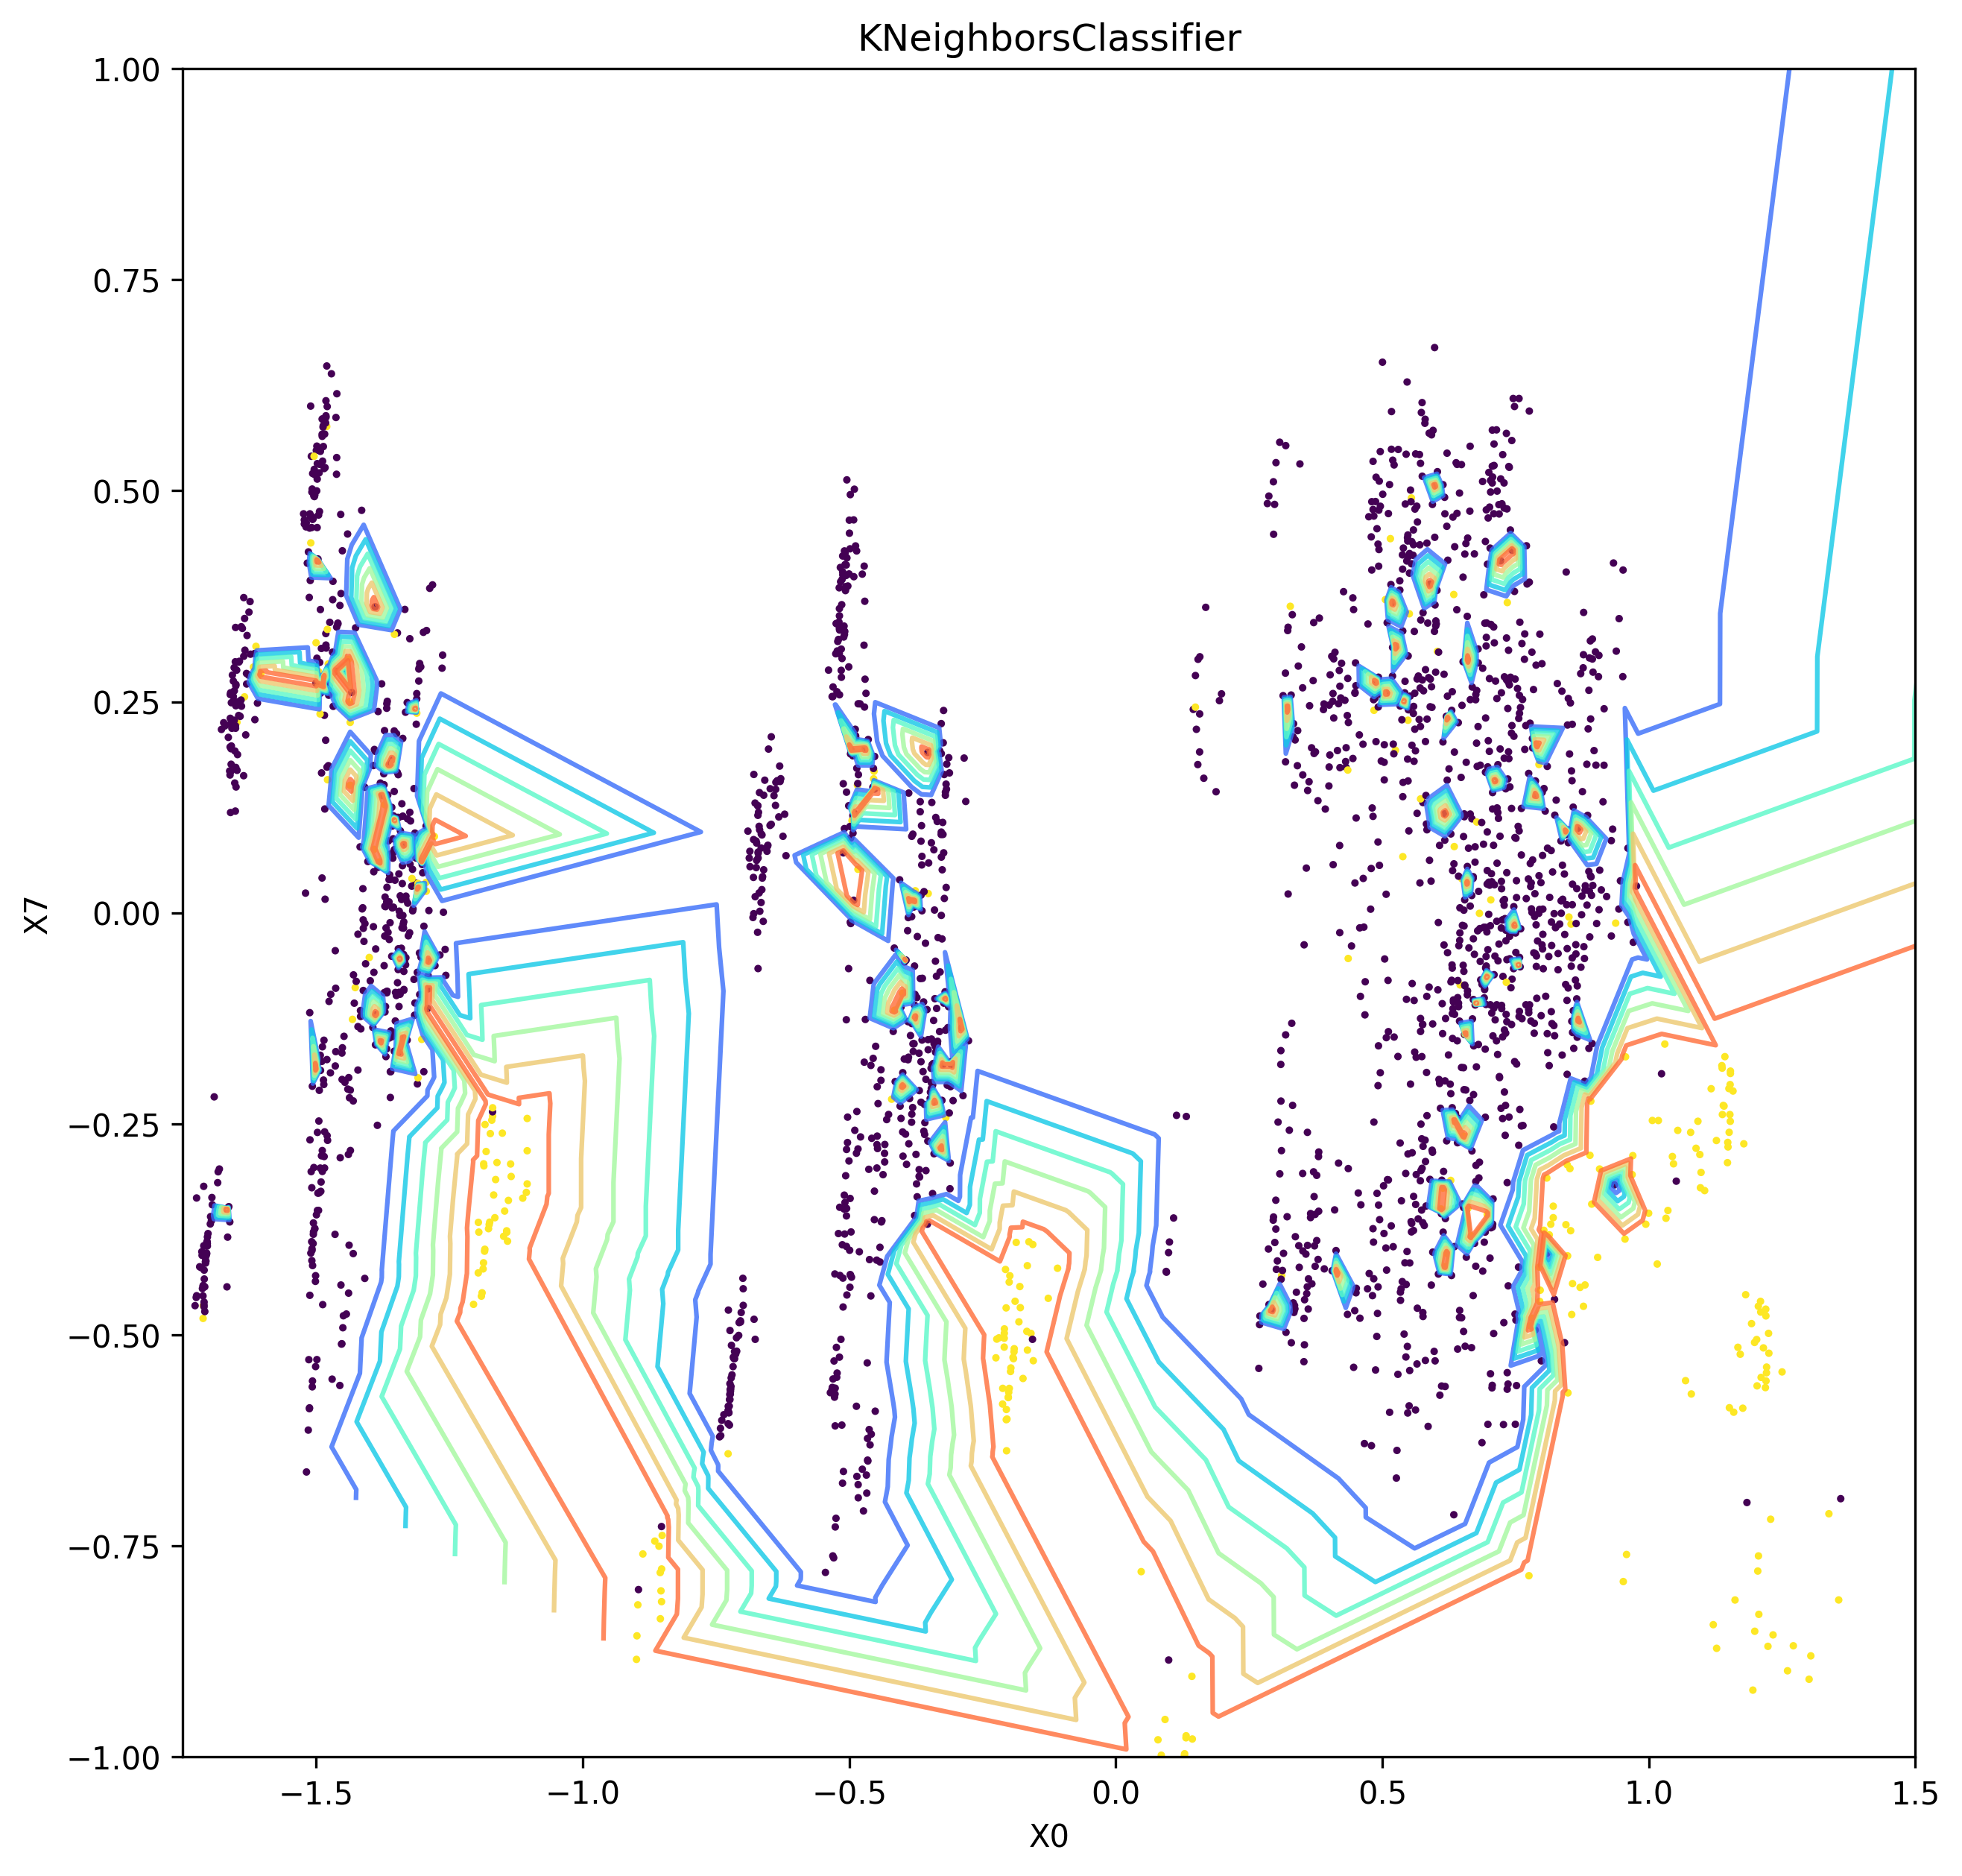

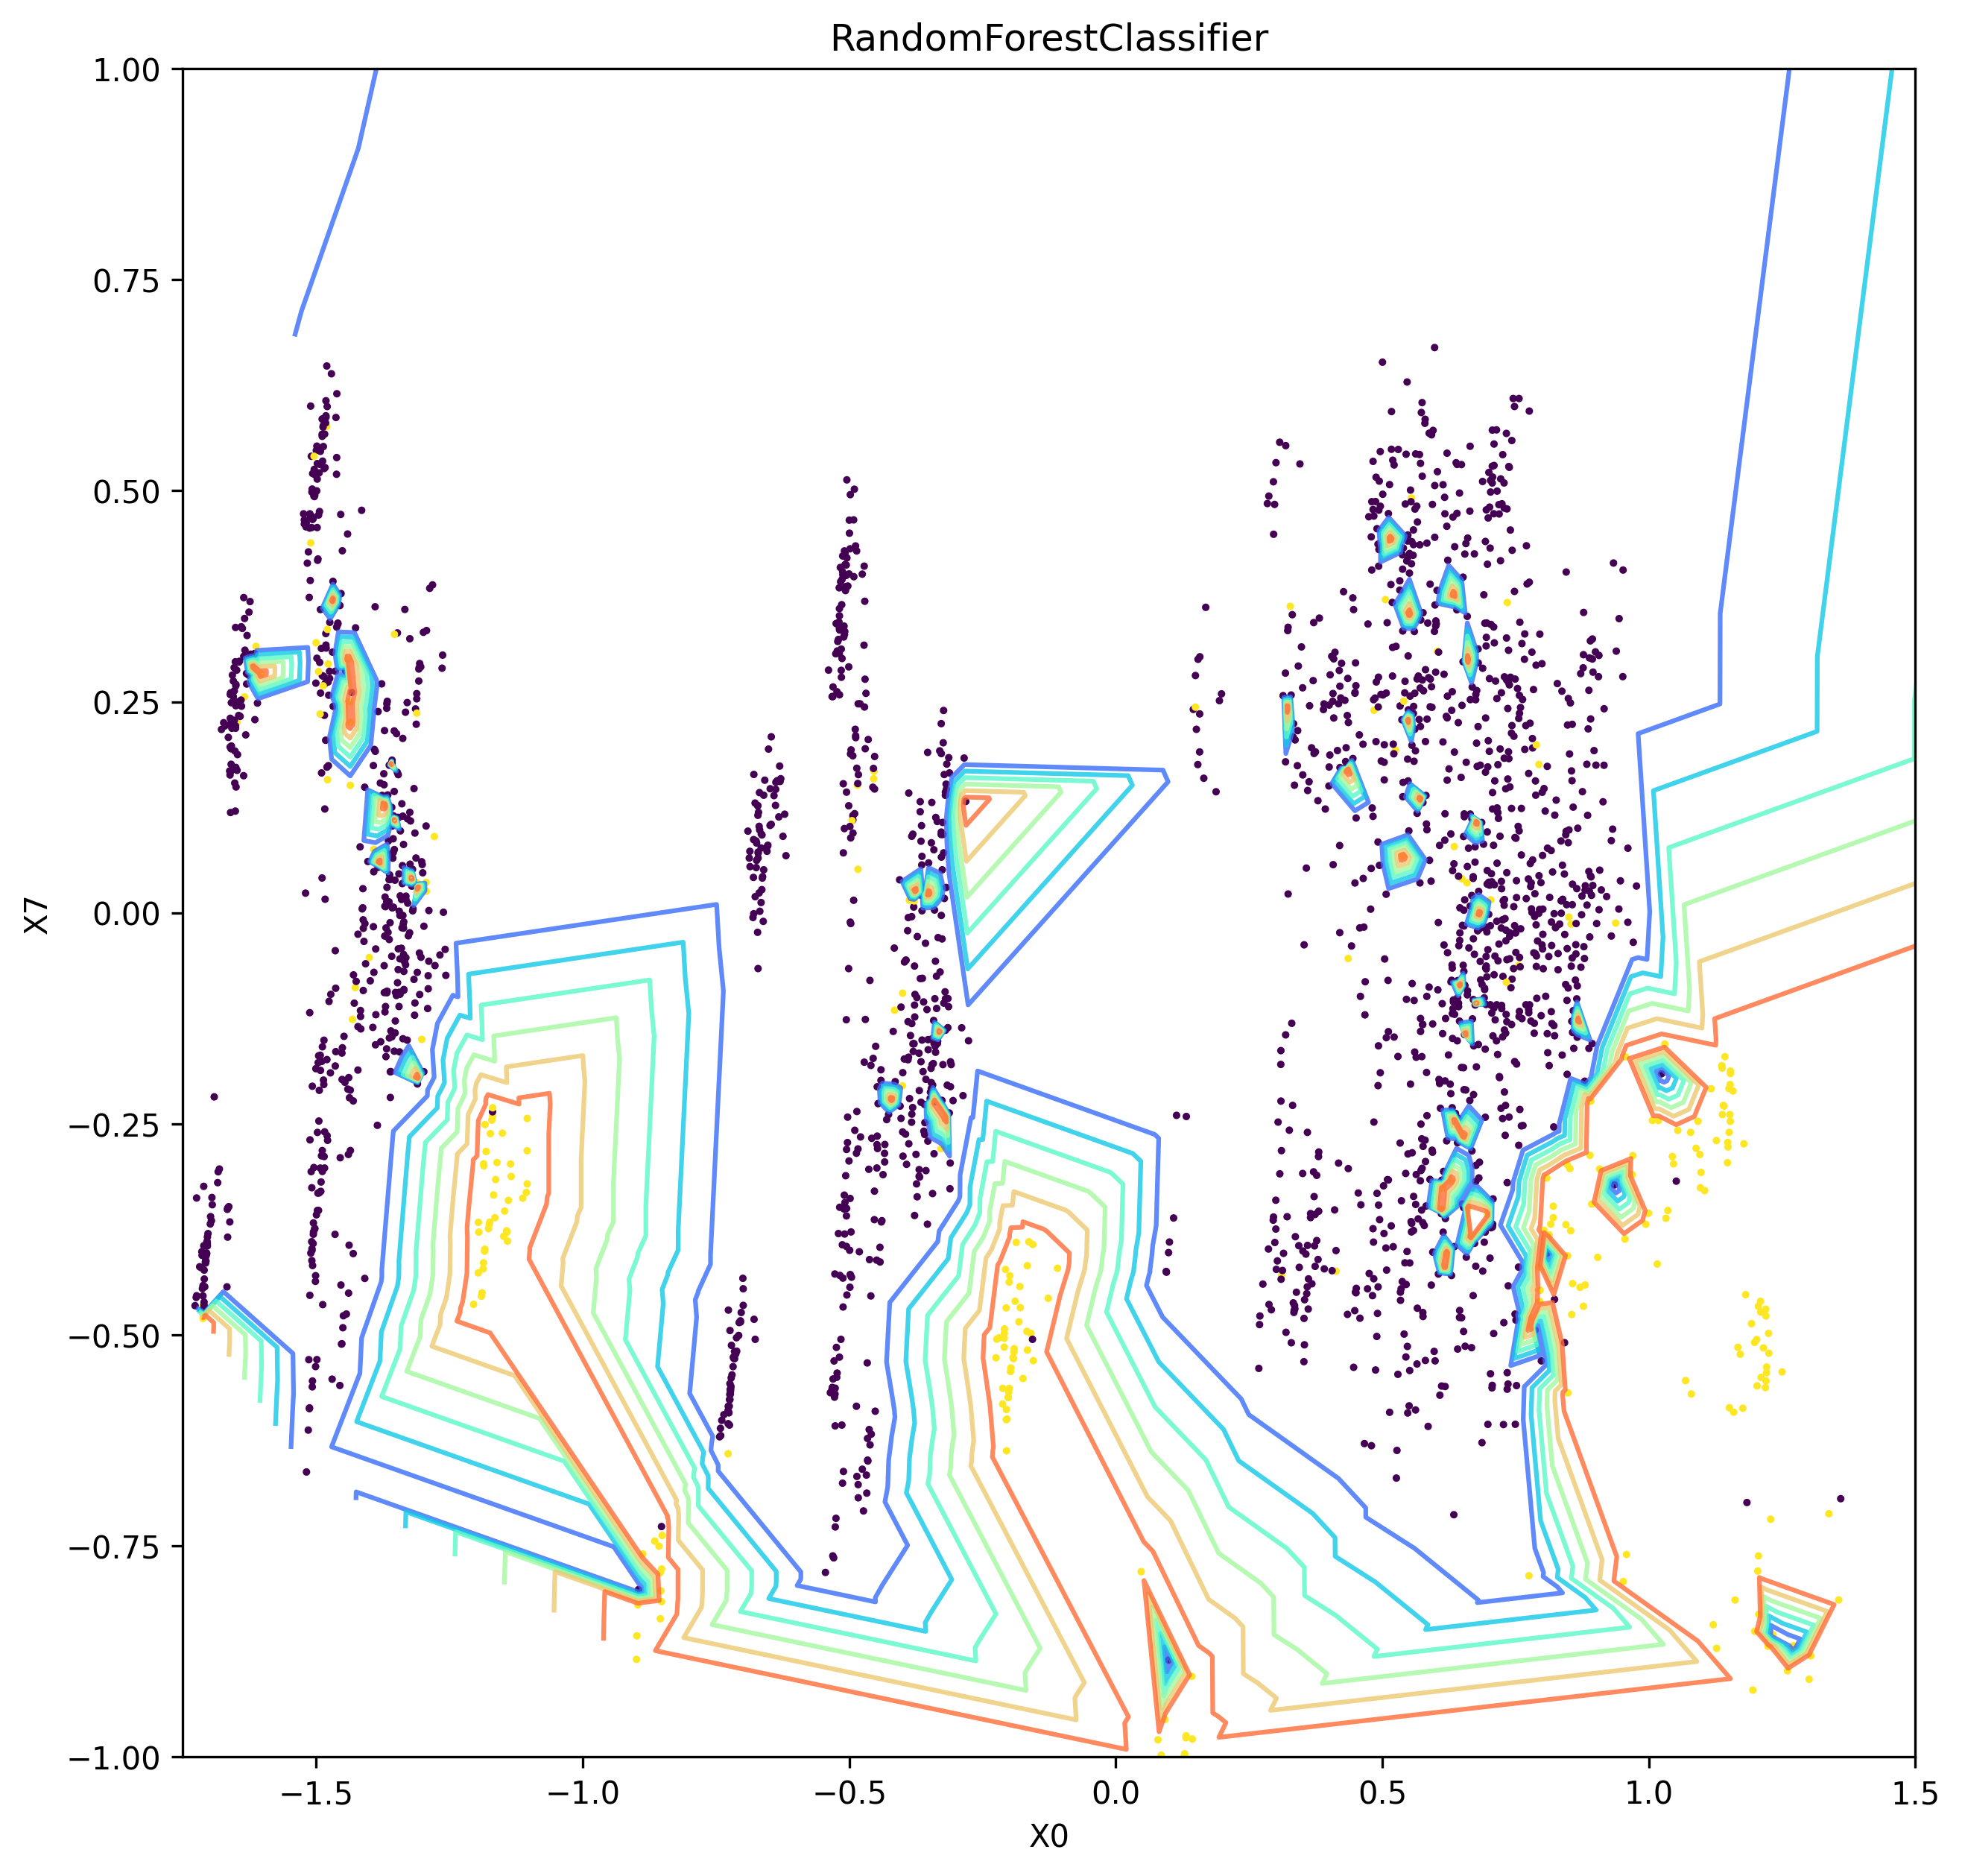

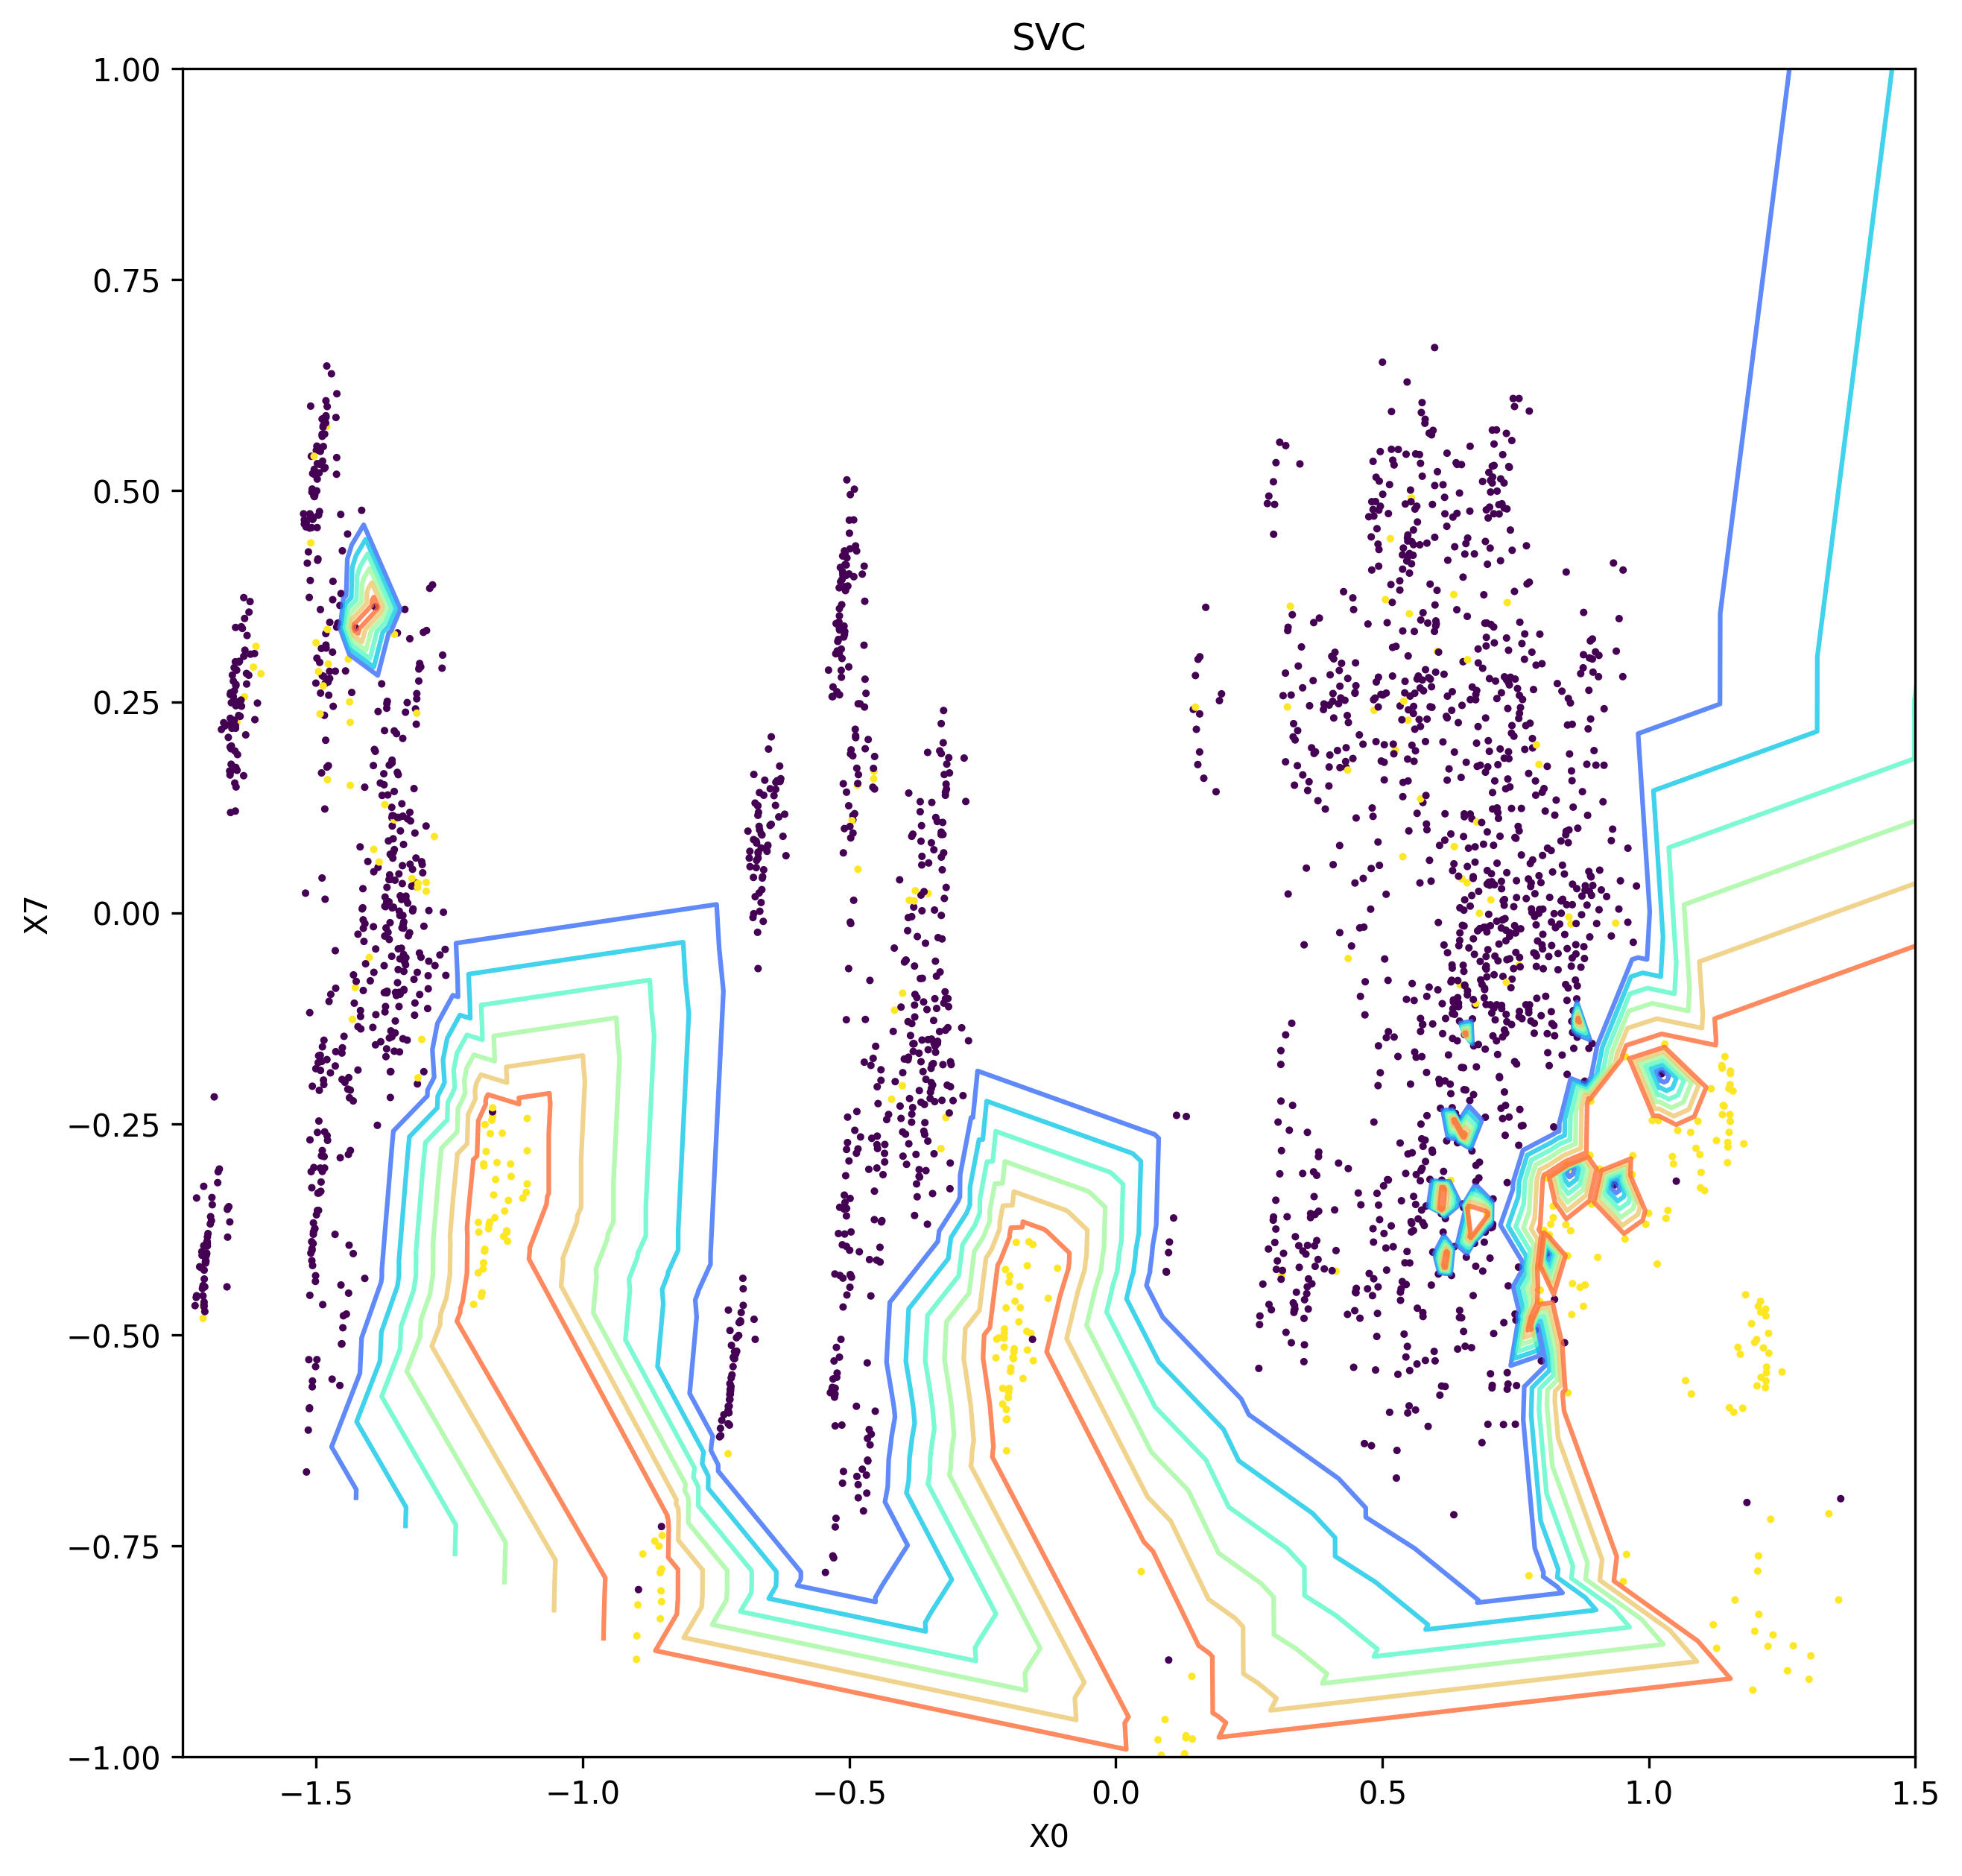

In [97]:
for name in listdir('working_data/'):
    if 'initial_changed' in name: continue
    model=pickle.load(open('working_data/'+name,'rb'))
    name=name.split('.')[0]
    clf=model[name.lower()]
    Z = clf.predict(X)
    xx,yy=X[:,0], X[:,7]
    tri = Triangulation(xx,yy)
    plt.figure(figsize=(10,10),dpi=300)
    plt.tricontour(tri, Z, cmap=plt.cm.rainbow, alpha=0.8)
    plt.scatter(xx,yy, c=Y, s=2)
    plt.title(name)
    plt.ylabel('X7')
    plt.xlabel('X0')
    plt.xlim(-1.75,1.5)
    plt.ylim(-1,1)

2500